<a href="https://colab.research.google.com/github/anjoya/FSD/blob/new/FSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE QUESTION**

---


The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account


 and the appropriateness of the available data to answer the given question

## **METRIC OF SUCCESS**
By reviewing the data, we should be able to tell who has bank account given their demographic factors. This should also aid in predicting who will most likely need a bank account.

## THE CONTEXT 


Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.


## **EXPERIMENTAL DESIGN**



*   Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question

*   Data cleaning-Find and deal with outliers, anomalies, and missing data within the dataset.

*   Exploratory data analysis-Perform univariate, bivariate and multivariate analysis recording your observations.


*   Conclusion




In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#importing the libraries necessary for the project

In [3]:
dataset=pd.read_csv('/content/Financial Dataset - 1.csv')
dataset
#uploading the data.This section also shows the size of our dataframe

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [4]:
#indicates number of values in each column the respective data types.This also infers those without.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [5]:
#removing missing data.
dataset=dataset.dropna()


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23343 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23343 non-null  object 
 1   year                    23343 non-null  int64  
 2   uniqueid                23343 non-null  object 
 3   Has a Bank account      23343 non-null  object 
 4   Type of Location        23343 non-null  object 
 5   Cell Phone Access       23343 non-null  object 
 6   household_size          23343 non-null  float64
 7   Respondent Age          23343 non-null  float64
 8   gender_of_respondent    23343 non-null  object 
 9   The relathip with head  23343 non-null  object 
 10  marital_status          23343 non-null  object 
 11  Level of Educuation     23343 non-null  object 
 12  Type of Job             23343 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [7]:
#since we are looking at the east african countries homogeneiously, i will drop ithe country and year columns since the period is almost similar.
dataset.drop(columns=['uniqueid','year','country'], inplace=True)
dataset

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23519,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [8]:
#this gives a brief desciption of the int and float columns of the data. while we could ignore 
#the mean,std and percentiles for the year column as this is irrelevant,we have however identified an anomaly with the year column max year being 2056 instead of 2018
#Note that this function ignores the Nan values.
dataset.describe()

,household_size,Respondent Age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


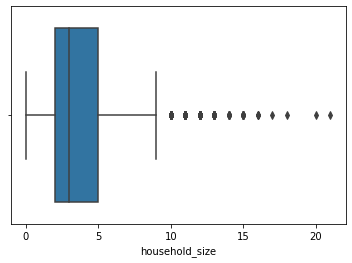

In [9]:
# checking for outliers

sns.boxplot(dataset['household_size'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


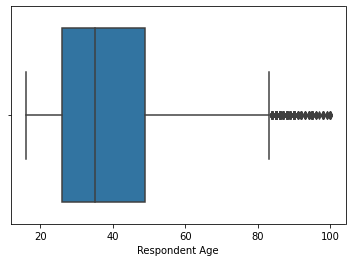

In [10]:
#checking outliers in respodents age using boxplots. 
#The median respondents age is 35. This means half of the respondents were below 35 years, while the other half above 35 years.
#From the below boxplot number and above the first quartile(Q1) is at 26 and thhird quartile(Q3) is 49 
#The interquartile range is 23. 1.5IQR is 34.5 
#The outliers are defined as any respondents that lie in Q1-1.5IQR and Q3+ 1.5IQR. In this case, any respondents between -18.5(none) or
#any respondents above 83.5
sns.boxplot(dataset['Respondent Age'])

checking outliers in respodents age and Household size. 


*   #The median respondents age is 35. This means half of the respondents were below 35 years, while the other half above 35 years
*   From the below boxplot number and above the first quartile(Q1) is at 26 and third quartile(Q3) is 49 
*   The interquartile range is 23. 1.5IQR is 34.5 
*   The outliers are defined as any respondents that lie in Q1-1.5IQR and Q3+ 1.5IQR. In this case, any respondents between -18.5(none) or any respondents above 83.5


*   The median household size is 3. This means half of the respondentsare from a household of 3 and below, while the other half above 3 individuals
*   From the below boxplot number and above the first quartile(Q1) is at 3 and third quartile(Q3) is 5 
*   The interquartile range is 2. 
*   1.5IQR is 3
*   The outliers are defined as any respondents that lie in Q1-1.5IQR and Q3+ 1.5IQR. In this case, any respondents between -1(none) or any respondents above 8

.




## Exploratory Analysis: univariate analysis

In [11]:
dataset.describe()

,household_size,Respondent Age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [12]:
print(dataset['household_size'].mode())
print(dataset['Respondent Age'].mode())

0    2.0
dtype: float64
0    30.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


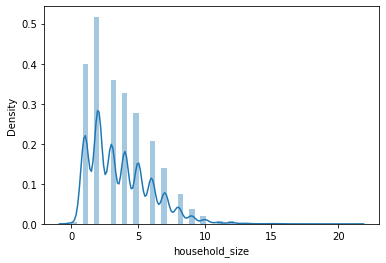

In [13]:
sns.distplot(dataset['household_size'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


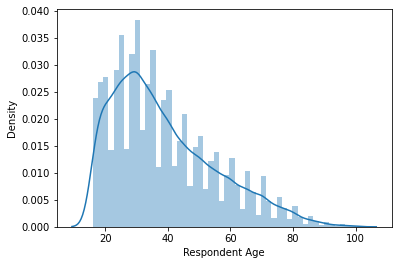

In [14]:
sns.distplot(dataset['Respondent Age'])

In [15]:
print(dataset['household_size'].skew())
print(dataset['Respondent Age'].skew())

0.9741086837897069
0.840661747532081


In [16]:
print(dataset['household_size'].kurt())
print(dataset['Respondent Age'].kurt())

1.1538690689335573
0.09844652254807196


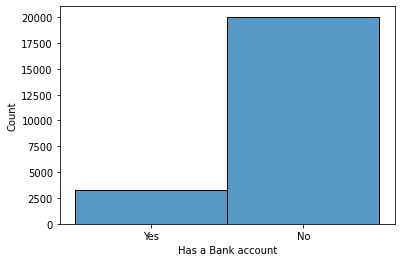

In [17]:
#No of people with bank accounts vs those who don't
dataset['Has a Bank account'].value_counts()
sns.histplot(dataset['Has a Bank account'])

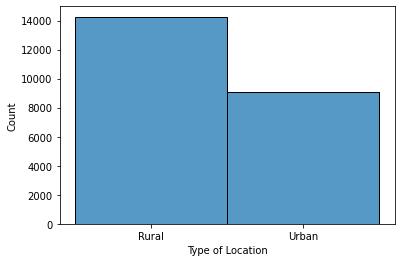

In [18]:
#No of people with in urban vs rural areas
sns.histplot(dataset['Type of Location'])

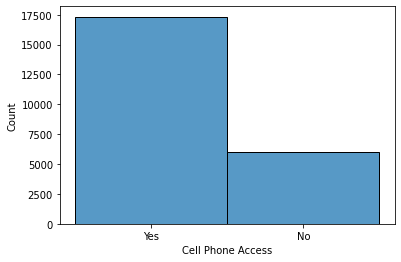

In [19]:
#No of people with with cell phone access vs those who dont
sns.histplot(dataset['Cell Phone Access'])

([<matplotlib.patches.Wedge at 0x7fd4b4cac310>,
 [Text(-0.30612673854809475, 1.0565445660008417, 'Female'),
  Text(0.3061267385480949, -1.0565445660008415, 'Male')],
 [Text(-0.1669782210262335, 0.576297036000459, '59%'),
  Text(0.16697822102623355, -0.5762970360004589, '41%')])

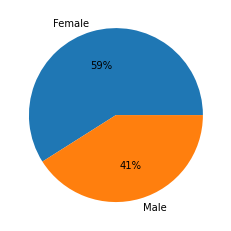

In [20]:
#Respondents by gender
dataset['gender_of_respondent'].value_counts()

plt.pie(dataset['gender_of_respondent'].value_counts(), labels=['Female','Male'], autopct='%.0f%%')

(array([   0., 1983., 2790., 3218., 3253., 2640., 2061., 1697., 1418.,
        1107.,  936.,  749.,  616.,  415.,  241.,  135.,   49.,   35.]),
 array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
         75,  80,  85,  90,  95, 100]),
 <a list of 18 Patch objects>)

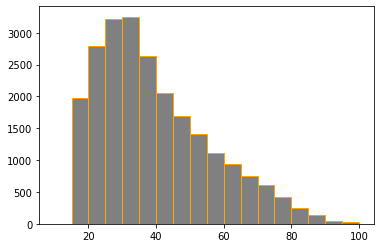

In [21]:
#ploting a histogram of 5 year age brackets.
plt.hist(dataset['Respondent Age'], bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],color='grey',edgecolor='orange')

(array([3.600e+01, 3.928e+03, 5.072e+03, 3.514e+03, 3.200e+03, 2.716e+03,
        2.029e+03, 1.378e+03, 7.400e+02, 3.540e+02, 1.910e+02, 6.600e+01,
        6.600e+01, 2.500e+01, 9.000e+00, 1.100e+01, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 20 Patch objects>)

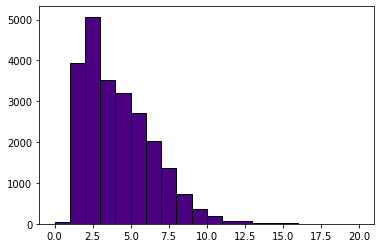

In [22]:
#ploting a histogram of house hold size.
plt.hist(dataset['household_size'], bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='indigo',edgecolor='black')

# Bivariate Analysis

In [23]:
dataset.corr()

,household_size,Respondent Age
household_size,1.000000,-0.119709
Respondent Age,-0.119709,1.000000


There is a very small correlation between house hold size and the respondents age 

Since our interest is in those who have a bank account and don't.We run bivariate analysis based on this against the other variables

In [24]:
bybank=dataset.groupby('Has a Bank account')
bybank['Type of Location'].value_counts()


Has a Bank account  Type of Location
No                  Rural               12601
                    Urban                7445
Yes                 Rural                1663
                    Urban                1634
Name: Type of Location, dtype: int64

Text(0.5, 0, 'Location')

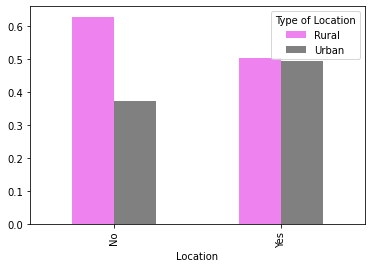

In [39]:
bybank['Type of Location'].value_counts(normalize=True).unstack().plot(kind="bar", color=('violet','grey'))
plt.xlabel('Location')



*  The highest number of people who dont have a bank account also live in rural areas then in urban areas.
*   There is almost a similar number of people who live in rural and aurban centres who have bank accounts.



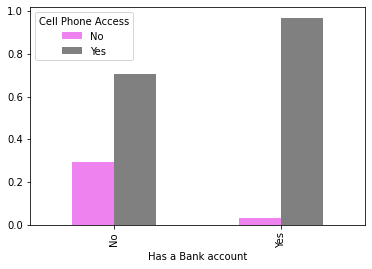

In [38]:
bybank['Cell Phone Access'].value_counts(normalize=True).unstack().plot(kind="bar", color=('violet','grey'))




*   The  majority of people who have cell phone do not  have a bank account followed by those who neiter have access to a cell phone and a bank account.
*   Very few people have an account but have no access to a cell phone



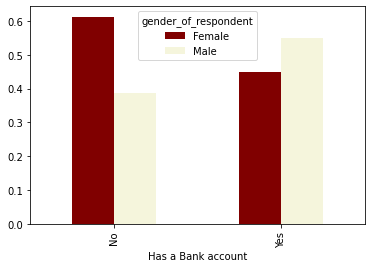

In [37]:
bybank['gender_of_respondent'].value_counts(normalize=True).unstack().plot(kind="bar", color=('maroon','beige'))


    

*    The highest gender without bank accounts is female followed by the male respondents who do not have a bank account.
*  There are almost as many female as there are male who have bank accounts




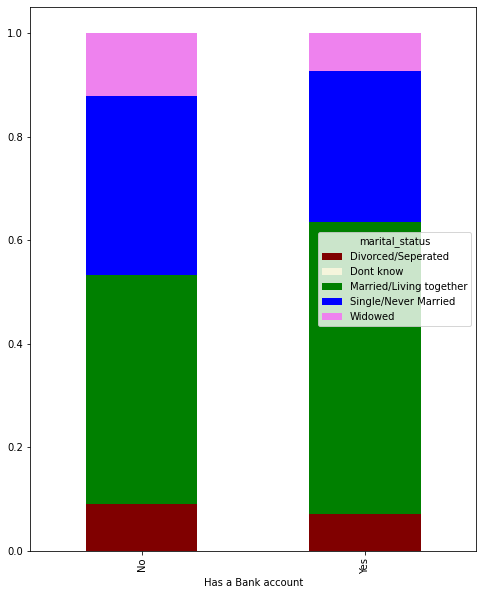

In [67]:
marital=bybank['marital_status'].value_counts(normalize=True).unstack()
marital
marital.plot(kind="bar",figsize=(8, 10), color=('maroon','beige','green','blue','violet'), stacked=True)

*    The majority of people who have a bank account are married,followed by single.  
*  The above observation can also be carried over to those who do not have a bank account.

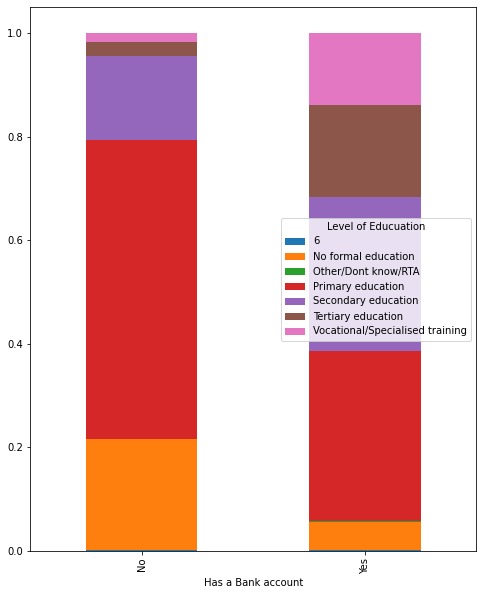

In [66]:
education=bybank['Level of Educuation'].value_counts(normalize=True).unstack()
education.plot(kind="bar",figsize=(8, 10), stacked=True)


# Multivariate Analysis

In [41]:
dataset2=dataset.copy()
dataset2

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...
23519,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
dataset2['Has a Bank account']=le.fit_transform(dataset2['Has a Bank account'].astype(str))

dataset2['Type of Location']=le.fit_transform(dataset2['Type of Location'].astype(str))

dataset2['Cell Phone Access']=le.fit_transform(dataset2['Cell Phone Access'].astype(str))

dataset2['gender_of_respondent']=le.fit_transform(dataset2['gender_of_respondent'].astype(str))

dataset2['marital_status']=le.fit_transform(dataset2['marital_status'].astype(str))

dataset2['Level of Educuation']=le.fit_transform(dataset2['Level of Educuation'].astype(str))

dataset2['Type of Job']=le.fit_transform(dataset2['Type of Job'].astype(str))

dataset2['The relathip with head']=le.fit_transform(dataset2['The relathip with head'].astype(str))


In [36]:
dataset2

,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,1,Rural,1,3.0,24.0,0,5,2,4,9
1,0,Rural,0,5.0,70.0,0,1,4,1,4
2,1,Urban,1,5.0,26.0,1,3,3,6,9
3,0,Rural,1,5.0,34.0,0,1,2,3,3
4,0,Urban,0,8.0,26.0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...
23519,0,Rural,1,4.0,48.0,0,1,0,1,7
23520,0,Rural,1,2.0,27.0,0,1,3,4,7
23521,0,Rural,1,5.0,27.0,0,4,4,3,7
23522,0,Urban,1,7.0,30.0,0,4,0,4,9
